In [1]:
import pandas as pd

In [2]:
iris_df = pd.read_csv("iris.csv")

In [3]:
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
X = iris_df.iloc[:, 0:4].values 

In [5]:
print(X[0])

[5.1 3.5 1.4 0.2]


In [6]:
y=iris_df.iloc[:,4].values 

In [7]:
print(y[0])

Setosa


In [8]:
X.shape

(150, 4)

In [9]:
y.shape

(150,)

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
C = len(np.unique(y)) 

In [14]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  
y_test_encoded = label_encoder.transform(y_test)

In [15]:
y_train_encoded[:10]

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0])

In [16]:
C = len(label_encoder.classes_)  # Number of unique classes
y_train_onehot = to_categorical(y_train_encoded, num_classes=C)
y_test_onehot = to_categorical(y_test_encoded, num_classes=C)

In [17]:
print(y_train_onehot[:10])

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [18]:
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Explicit Input layer
    layers.Dense(64, activation='relu'),             # Hidden layer
    layers.Dense(C, activation='softmax')            # Output layer
])

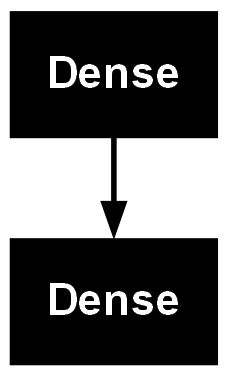

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
history = model.fit(X_train_scaled, y_train_onehot,
                    validation_data=(X_test_scaled, y_test_onehot),
                    epochs=100, batch_size=32)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9731 - loss: 0.1173 - val_accuracy: 1.0000 - val_loss: 0.1039
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9617 - loss: 0.1484 - val_accuracy: 1.0000 - val_loss: 0.1024
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9533 - loss: 0.1425 - val_accuracy: 1.0000 - val_loss: 0.1009
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9710 - loss: 0.1372 - val_accuracy: 1.0000 - val_loss: 0.0999
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9679 - loss: 0.1356 - val_accuracy: 1.0000 - val_loss: 0.0986
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9825 - loss: 0.1155 - val_accuracy: 1.0000 - val_loss: 0.0974
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9677 - loss: 0.1336 - val_accuracy: 1.0000 - val_loss: 0.0959
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9583 - loss: 0.1341 - val_accuracy: 1.0000 - val_loss:

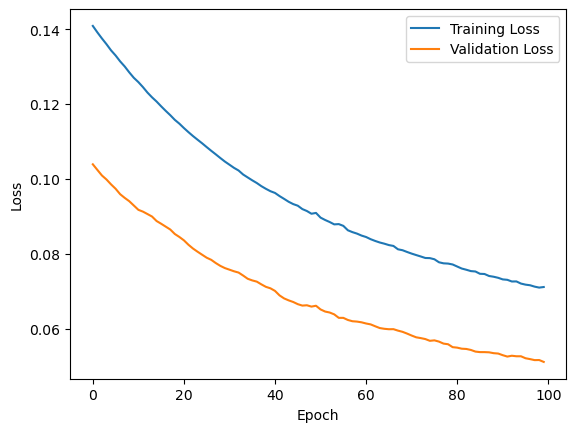

In [66]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [68]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,547 (6.05 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,032 (4.04 KB)

In [70]:
loss, accuracy = model.evaluate(X_test_scaled, y_test_onehot)
print(f"Test accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.0511
Test accuracy: 1.0000


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
y_predictions_test_onehot = model.predict(X_test_scaled)           
y_predictions_test = np.argmax(y_predictions_test_onehot, axis=1)    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [74]:
y_predictions_test_onehot[:10]

array([[1.5930891e-03, 9.7134644e-01, 2.7060516e-02],
       [9.9641836e-01, 3.5761516e-03, 5.4537782e-06],
       [3.2876687e-07, 1.1831370e-04, 9.9988127e-01],
       [4.8561487e-03, 8.8171995e-01, 1.1342385e-01],
       [9.8829088e-04, 9.0697205e-01, 9.2039630e-02],
       [9.9446023e-01, 5.5305958e-03, 9.2359123e-06],
       [1.0914700e-02, 9.8373735e-01, 5.3479616e-03],
       [3.5832622e-04, 1.1858911e-02, 9.8778278e-01],
       [6.9191202e-04, 6.4582884e-01, 3.5347930e-01],
       [2.3602745e-03, 9.9261218e-01, 5.0276234e-03]], dtype=float32)

In [76]:
y_predictions_test[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1], dtype=int64)

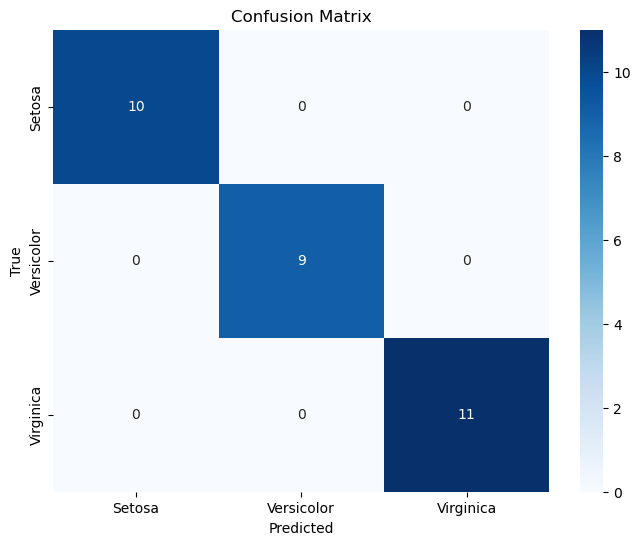

In [78]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_encoded, y_predictions_test)

# Step 10: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()